In [42]:
import trees as t

In [54]:
f = 'a2q'
graph = t.build(f, '2012-01-01', '2012-01-07')
# Date più recenti?
print(graph)

DiGraph with 27076 nodes and 36458 edges


We create the graph only about answer to question from the 1st january of 2012 and the 7TH of january of 2012

In [47]:
def direc(graph):
    for el in graph.edges:
        if (el[1],el[0]) not in graph.edges:
            return 'yes'
    return 'no' 

In [44]:
def fun1(graph):
    #number of users
    numusers=len(graph.nodes)
    #number of answers to question
    numanswers=len(graph.edges)
    #average number of links for each node
    average=numanswers/numusers
    #density degree of the graph
    tot=sum([graph.get_edge_data(el[0], el[1])['weight'] for el in graph.edges])
    density = tot / ((numusers)*(numusers)-1)
    density=round(density,4)
    #the graph is sparse or dense?
    if density<0.5:
        result = 'yes'
    else:
        result= 'no'
    
    return direc(graph),numusers,numanswers,average,density,result


In [55]:
fun1(graph)

('yes', 27076, 36458, 1.3465061308908257, 0.0001, 'yes')

VISUALIZATION


In [7]:
import pandas as pd

In [56]:
data=fun1(graph)

In [57]:
table = pd.DataFrame(data, columns =['result'])
table.index =['directed?', 'N° of users', 'N° of answers', 'average', 'density', 'sparse?']
table

,result
directed?,yes
N° of users,27076
N° of answers,36458
average,1.346506
density,0.0001
sparse?,yes


as we can see from the table the graph is directed, and there are 27076 nodes. each node represent a user. There are 36548 edges. Each edges represent an answer. The average of the answers at each question is 1.347 so the density of the graph is very very small. 

224


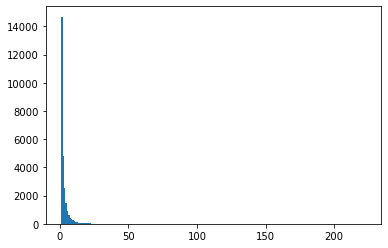

In [58]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def plot_degree_dist(grafo):
    degrees = [graph.degree(n) for n in graph.nodes()]
    print(max(degrees))
    plt.hist(degrees,bins=np.arange(min(degrees), max(degrees)))
    plt.show()

plot_degree_dist(nx.gnp_random_graph(100, 0.5, directed=True))